<a href="https://colab.research.google.com/github/manish-kumar-3/DSA0405-FODS/blob/main/Day_3_FODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21. **Scenario**: You are working on a dataset that contains information about various types of
fruits. The dataset includes features such as weight, color, and texture of the fruit. Your task is to
build a k-Nearest Neighbors (kNN) classifier to predict the type of fruit based on these features.
**Question**: Given a dataset with features like 'weight', 'color', and 'texture' of fruits, and their
respective 'type' (e.g., apple, orange, banana), how would you implement a k-Nearest Neighbors
classifier to predict the type of an unknown fruit based on its 'weight', 'color', and 'texture'
features? Additionally, discuss the process of choosing the optimal value of 'k' and handling
categorical features (like 'color' or 'type') in a kNN classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

data = {
    'weight': [150, 130, 120, 160, 140, 130],
    'color': ['red', 'green', 'yellow', 'red', 'green', 'yellow'],
    'texture': ['smooth', 'rough', 'smooth', 'rough', 'smooth', 'rough'],
    'type': ['apple', 'orange', 'banana', 'apple', 'orange', 'banana']
}

df = pd.DataFrame(data)

X = df[['weight', 'color', 'texture']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['weight']),
        ('cat', OneHotEncoder(), ['color', 'texture'])
    ])


knn_classifier = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])


knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


22. **Scenario**: You are tasked with implementing a decision tree classifier in Python to predict
whether an online shopper will make a purchase on an e-commerce platform. The dataset
provided includes attributes such as 'age', 'income', 'browsing_duration', 'device_type', and the
target variable 'purchase' (indicating whether a purchase was made or not).
**Question**: Given the dataset with the mentioned attributes and the 'purchase' label, how would
you use Python's scikit-learn library to create a decision tree classifier? Provide code to
preprocess categorical variables like 'device_type' for model training and predict whether a new
customer, with specific 'age', 'income', 'browsing_duration', and 'device_type', is likely to make a
purchase or not.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('onlinecustomer.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
df['device_type'] = label_encoder.fit_transform(df['device_type'])

# Split the dataset into features (X) and target variable (y)
X = df[['age', 'income', 'browsing_duration', 'device_type']]
y = df['purchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the model
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict for a new customer
new_customer_data = {'age': 26, 'income': 52000, 'browsing_duration': 18, 'device_type': 'mobile'}
new_customer_data['device_type'] = label_encoder.transform([new_customer_data['device_type']])[0]
new_customer_data = pd.DataFrame([new_customer_data])

prediction = decision_tree_classifier.predict(new_customer_data)
print(f"The predicted purchase decision for the new customer is: {prediction[0]}")


Accuracy: 1.00
The predicted purchase decision for the new customer is: yes


23. **Scenario**: You work for a financial institution, and your task is to develop a classification
model to assess the credit risk associated with loan applicants. The dataset provided contains
various attributes such as income, credit score, debt-to-income ratio, employment duration, and
the final 'risk' label indicating whether an applicant is high-risk or low-risk for a loan.
**Question**: Using the Classification and Regression Trees (CART) algorithm in Python, build a
predictive model to evaluate the credit risk of loan applicants based on features like 'income',credit score', 'debt-to-income ratio', and 'employment duration'? Provide a Python code that
preprocesses the data, builds a CART classifier, and predicts the credit risk level for a new loan
applicant with specific attribute values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('income.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
df['risk'] = label_encoder.fit_transform(df['risk'])

# Split the dataset into features (X) and target variable (y)
X = df[['income', 'credit_score', 'debt_to_income_ratio', 'employment_duration']]
y = df['risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CART classifier
cart_classifier = DecisionTreeClassifier()

# Train the model
cart_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cart_classifier.predict(X_test)

# Evaluate the model
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

# Predict credit risk level for a new loan applicant
new_applicant_data = {'income': 62000, 'credit_score': 680, 'debt_to_income_ratio': 0.4, 'employment_duration': 1}
new_applicant_data = pd.DataFrame([new_applicant_data])

# Predict credit risk level for the new applicant
prediction = cart_classifier.predict(new_applicant_data)
predicted_risk = label_encoder.inverse_transform(prediction)[0]
print(f"The predicted credit risk level for the new applicant is: {predicted_risk}")


Accuracy: 1.00
The predicted credit risk level for the new applicant is: low


24. A company wants to know the most popular product they sell. They have a list of all the
products they have sold in the past year, along with the number of times each product was sold.
Write a program that will calculate the frequency distribution of products sold and print out the
most popular product.

In [ ]:
# Sample data: product_sales is a dictionary where keys are product names, and values are the number of times each product was sold.
product_sales = {
    'ProductA': 100,
    'ProductB': 150,
    'ProductC': 120,
    'ProductD': 200,
    'ProductE': 80,
}

# Calculate the frequency distribution
frequency_distribution = {product: sales for product, sales in sorted(product_sales.items(), key=lambda x: x[1], reverse=True)}

# Print the frequency distribution
print("Product Sales Frequency Distribution:")
for product, sales in frequency_distribution.items():
    print(f"{product}: {sales} times")

# Find the most popular product
most_popular_product = max(product_sales, key=product_sales.get)
print(f"\nThe most popular product is: {most_popular_product} (Sold {product_sales[most_popular_product]} times)")


Product Sales Frequency Distribution:
ProductD: 200 times
ProductB: 150 times
ProductC: 120 times
ProductA: 100 times
ProductE: 80 times

The most popular product is: ProductD (Sold 200 times)


25. Given a dataset, write a program to perform estimation techniques such as mean estimation,
variance estimation, and sampling techniques to infer population characteristics

In [ ]:
import numpy as np
import pandas as pd

# Sample dataset (replace this with your actual dataset)
np.random.seed(42)
population_data = np.random.randint(1, 100, 1000)

# Mean estimation
population_mean = np.mean(population_data)
print(f"Population Mean: {population_mean:.2f}")

# Variance estimation
population_variance = np.var(population_data)
print(f"Population Variance: {population_variance:.2f}")

# Simple random sampling (SRS)
sample_size = 100
sample = np.random.choice(population_data, size=sample_size, replace=False)

# Sample mean estimation
sample_mean = np.mean(sample)
print(f"\nSample Mean: {sample_mean:.2f}")

# Sample variance estimation
sample_variance = np.var(sample, ddof=1)  # Use ddof=1 for sample variance
print(f"Sample Variance: {sample_variance:.2f}")

# Display the first 10 values of the population and the sample
print("\nFirst 10 values of the population:")
print(population_data[:10])

print("\nFirst 10 values of the sample:")
print(sample[:10])


Population Mean: 49.56
Population Variance: 856.91

Sample Mean: 51.80
Sample Variance: 836.89

First 10 values of the population:
[52 93 15 72 61 21 83 87 75 75]

First 10 values of the sample:
[79 85 15 73 53 32 42 63 64 36]


26. A weather station wants to know if there is a correlation between the temperature and the
amount of rainfall in a city. They have data on the temperature and rainfall each day for the past
year in that city. Write a program that will calculate the correlation coefficient between
temperature and rainfall, and create a scatter plot of the data.

Correlation Coefficient: -0.06


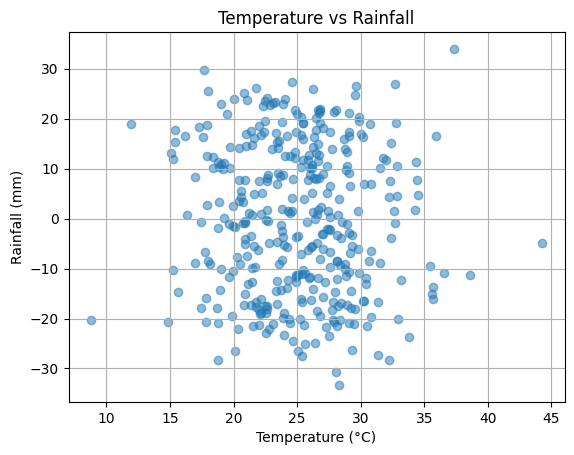

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
np.random.seed(42)
days = np.arange(1, 366)
temperature = np.random.normal(25, 5, 365)  # Mean temperature of 25 with standard deviation of 5
rainfall = 20 * np.sin(np.linspace(0, 2 * np.pi, 365)) + np.random.normal(0, 5, 365)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(temperature, rainfall)[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Create a scatter plot
plt.scatter(temperature, rainfall, alpha=0.5)
plt.title("Temperature vs Rainfall")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()


27. Scenario: Suppose you are a data analyst working for a marketing firm. The firm is
interested in estimating the average revenue generated from a recent marketing campaign
conducted on social media. You've collected a sample of the revenue generated by 100
customers who made purchases after clicking on the ads.
Question: Using Python, how would you calculate the confidence interval for the average
revenue from these 100 customers? Provide Python code that computes the confidence interval at
a specified confidence level (e.g., 95%) for the mean revenue.

In [ ]:
import numpy as np
from scipy.stats import t

# Sample data (replace this with your actual dataset)
np.random.seed(42)
sample_size = 100
revenue_sample = np.random.normal(500, 100, sample_size)  # Replace with your actual data

# Calculate sample statistics
sample_mean = np.mean(revenue_sample)
sample_std = np.std(revenue_sample, ddof=1)  # Use ddof=1 for sample standard deviation

# Confidence level and degrees of freedom
confidence_level = 0.95
degrees_of_freedom = sample_size - 1

# Calculate the margin of error
margin_of_error = t.ppf((1 + confidence_level) / 2, degrees_of_freedom) * (sample_std / np.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


Sample Mean: 489.62
Confidence Interval (95.0%): (471.60, 507.64)


28. Consider a sample car dataset and plot Mutlivariate graphs to show the distribution of data
from multiple variables for Multivariate Scatterplot and Scatter Plot Matrix

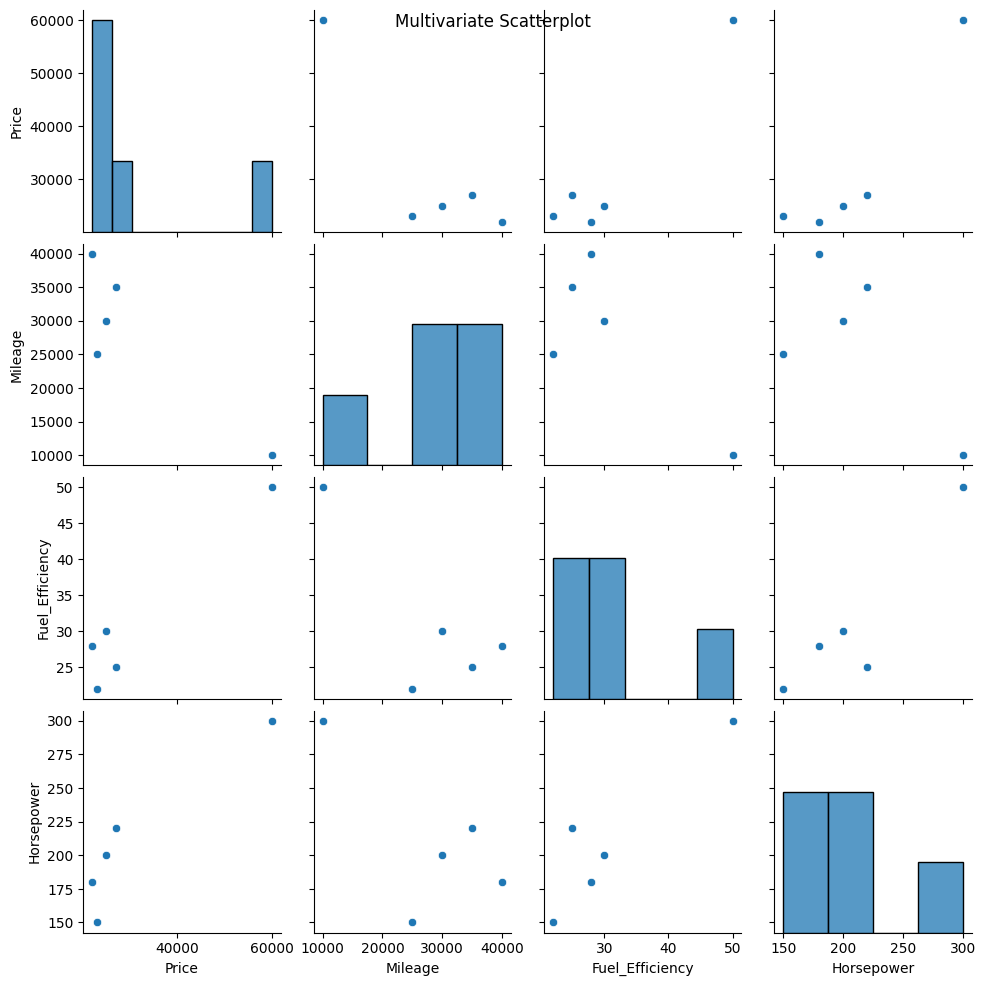

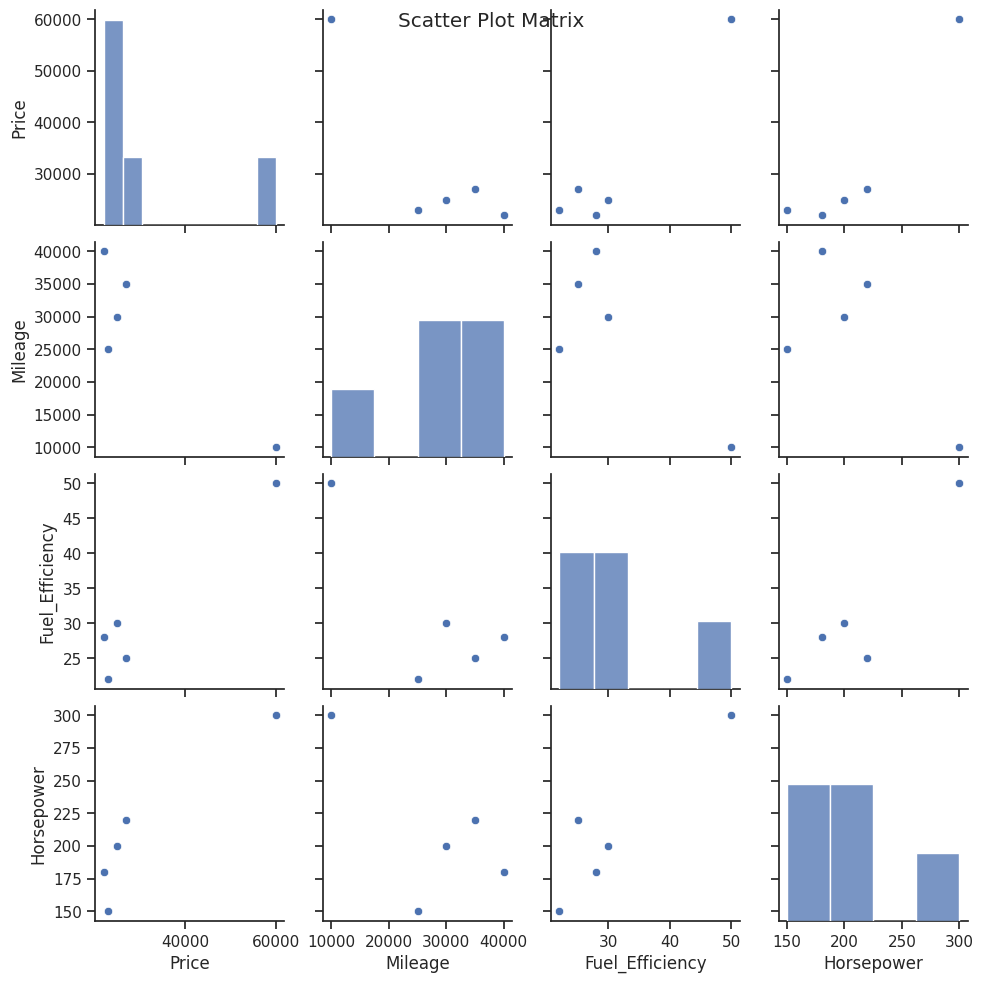

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample car dataset (replace this with your actual dataset)
data = {
    'Car': ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Tesla'],
    'Price': [25000, 22000, 27000, 23000, 60000],
    'Mileage': [30000, 40000, 35000, 25000, 10000],
    'Fuel_Efficiency': [30, 28, 25, 22, 50],
    'Horsepower': [200, 180, 220, 150, 300]
}

df = pd.DataFrame(data)

# Multivariate Scatterplot
sns.pairplot(df, vars=['Price', 'Mileage', 'Fuel_Efficiency', 'Horsepower'])
plt.suptitle("Multivariate Scatterplot")
plt.show()

# Scatter Plot Matrix
sns.set(style="ticks")
sns.pairplot(df)
plt.suptitle("Scatter Plot Matrix")
plt.show()


29. Imagine you are an analyst for a popular online shopping website. Your task is to analyze
customer reviews and provide insights on the average rating and customer satisfaction level for a
specific product category. You will use the pandas library to calculate confidence intervals to
estimate the true population mean rating. You have been provided with a CSV file named
"customer_reviews.csv," which contains customer ratings for products in the chosen category

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the customer reviews dataset
df = pd.read_csv("customer reviews.csv")  # Replace with your actual file path

# Display the first few rows of the dataset
print("Sample of the Customer Reviews Dataset:")
print(df.head())

# Calculate the mean and standard deviation of customer ratings
mean_rating = df['Rating'].mean()
std_dev_rating = df['Rating'].std()

# Calculate the standard error of the mean
standard_error = std_dev_rating / np.sqrt(len(df))

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * standard_error

# Calculate the confidence interval
confidence_interval = (mean_rating - margin_of_error, mean_rating + margin_of_error)

# Display the results
print("\nResults:")
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Standard Error of the Mean: {standard_error:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


Sample of the Customer Reviews Dataset:
      Product  Rating
0      Laptop     4.5
1  Smartphone     3.8
2  Headphones     4.2
3      Tablet     5.0
4      Camera     3.5

Results:
Mean Rating: 4.17
Standard Deviation: 0.53
Standard Error of the Mean: 0.22
Confidence Interval (95.0%): (3.74, 4.59)


30. You are a data scientist working for a company that sells shoes. You are tasked with writing
a program that will calculate the frequency distribution of shoe sizes sold in the past year. The
data is stored in a file called shoe_sales.csv. The file contains the following columns: • shoe_size: The size of the shoe sold. • quantity: The number of shoes sold in that size.
Write a program that will read the data from the file and calculate the frequency distribution of
shoe sizes. The program should output the frequency distribution table, as well as a bar chart
showing the frequency of each shoe size

Frequency Distribution Table:
7     2
8     3
9     3
10    2
Name: shoe_size, dtype: int64


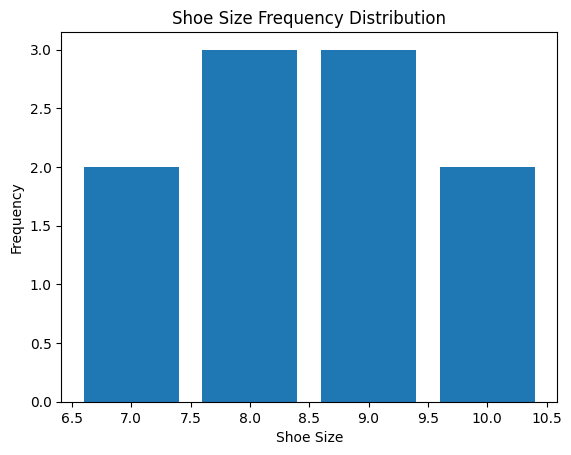

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'shoe sale.csv'
df = pd.read_csv(file_path)

# Calculate the frequency distribution of shoe sizes
size_counts = df['shoe_size'].value_counts().sort_index()

# Display the frequency distribution table
print("Frequency Distribution Table:")
print(size_counts)

# Plot the bar chart
plt.bar(size_counts.index, size_counts.values)
plt.xlabel('Shoe Size')
plt.ylabel('Frequency')
plt.title('Shoe Size Frequency Distribution')
plt.show()
